# Ali


# Given structure

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv("/content/drive/Shareddrives/Team 8- Neural Network/Assignment-3/Perceptron_TestData.csv")

Mounted at /content/drive


In [91]:
class Perceptron():
  def __init__(self, num_features):
    # self.weights =np.zeros(1 + num_features) # considering the bias inside the weight at [0] index
    self.weights = np.full(1 + num_features,-50,float) ##this has less accuracy
    
  def forward(self, xi):
    weight_sum = np.dot(xi, self.weights[1:])+ self.weights[0]
    prediction = np.where(weight_sum >= 0.0, 1, 0) 
    return prediction

  """Please describe"""
  def backward(self, update):
    return abs(update)

  def train(self, X, y, epochs):
  # <your code> to compute the prediction error
  # Note: you can add (variables, arrays, lists etc.) to the definition of self to allow 
  # access to elements across diferent functions.
    self.errors_ = []
    self.allW_=[]
    
    for e in range(epochs):
      errors=0    
      self.allW_.append(self.weights.copy())
      for xi, target in zip(X, y):
        update = target - self.forward(xi)
        self.weights[1:] += update * xi
        self.weights[0] += update
        errors += self.backward(update)
      self.errors_.append(errors)
   
    return self  
      # <your code> to update the weights and bias


  def evaluate(self, X, y):
    # <your code> to compute the prediction accuracy
    accuracy=[100 - err for err in self.errors_]
    return accuracy



  def predict(self, X):
    """Return class label after unit step"""
        # return a numpy array of predictions (preds) based on your final weights and biases. The
      # dimension should match the number of rows so that it can compare the Class column with the
      # array returned
    preds=self.forward(X)
    return preds
      
  

  

In [31]:
ourFile='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-3/Perceptron_TestData.csv'
df = pd.read_csv(ourFile, header=None)
df.tail()

,0,1,2
96,5.7,4.2,1.0
97,5.7,4.2,1.0
98,6.2,4.3,1.0
99,5.1,3.0,1.0
100,5.7,4.1,1.0


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

num_col=len(df.columns)
num_row=len(df)
num_feat=2

y=df.iloc[1:num_row-1, num_col-1].values.astype(float).astype(int)

X = df.iloc[1:num_row-1, [0, num_col-2]].values.astype(float) 
epochs=10
# print(X)
# print(y)


Accuracy During the training


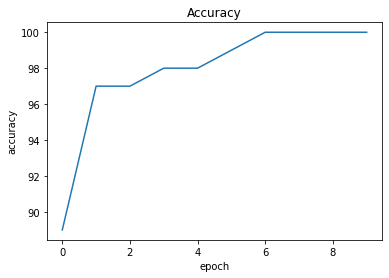

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


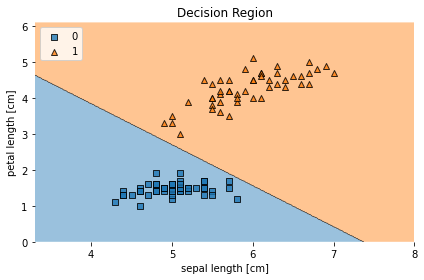

In [95]:
ppn = Perceptron(num_feat)

ppn.train(X,y,epochs)
epochs_=np.arange(0, epochs, 1)


# Make the first plot
print('\033[1m'+'\033[4m'+"Accuracy During the training"+'\033[0m')
plt.plot(epochs_,ppn.evaluate(X,y))
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


# print(ppn.predict(X))
# print(ppn.weights)
# print(ppn.evaluate(X,y))

plot_decision_regions(X, y, clf=ppn)
plt.title("Decision Region")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

In [12]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
              
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi  #increasing here but can do either sub/add
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [13]:
file1='https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/iris/iris.data'
ourFile='/content/drive/Shareddrives/Team 8- Neural Network/Assignment-3/Perceptron_TestData.csv'
# df = pd.read_csv(file1, header=None)
df = pd.read_csv(ourFile, header=None)
df.tail()


,0,1,2
96,5.7,4.2,1.0
97,5.7,4.2,1.0
98,6.2,4.3,1.0
99,5.1,3.0,1.0
100,5.7,4.1,1.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions


# select setosa and versicolor

num_col=len(df.columns)
num_row=len(df)
num_feat=2



y = df.iloc[1:num_row-1, 2].apply(float).values


y = np.where(y == 0.0, 0, 1)

# extract sepal length and petal length
X = df.iloc[1:num_row-1, [0, 1]].values.astype(float) 

print(X)
print(y)


3


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


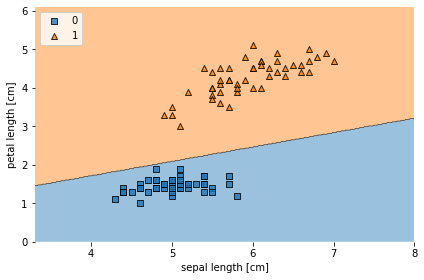

In [15]:

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
# print(ppn.predict(X))
print(len(ppn.w_))

plot_decision_regions(X, y, clf=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

# Kyle


# Bens
